# 0. SOME PRELIMINARIES 

### Niall O'Neill (100394545) and Karolina Sidlauskaite (100392576)

In [1]:
# Import some libraries
import matplotlib.pyplot as plt 
# For plotting data
import numpy as np              
# For Panda dataframes. A dataframe is a matrix-like structure, 
# similar to R dataframes  
import pandas as pd

import os
os.getcwd()

'C:\\Users\\niall\\OneDrive\\Documents\\Big Data Masters\\Big Data Intelligence\\Assignment 3'

The "wind_pickle" file contains data in a binary format called "Pickle". Pickle data loads faster than text data.

In [2]:
data = pd.read_pickle('wind_pickle.pickle')

You can visualize the attributes in the dataset. Very important, the output attribute (i.e. the value to be predicted, **energy**, is the first attribute). **Steps** represents the hours in advance of the forecast. We will not use this variable here.

In [3]:
# The dataset contains 5937 instances and 556 attributes (including 
# the outcome to be predicted)
print(data.shape)
data.columns.values.tolist()

(5937, 556)


['energy',
 'steps',
 'year',
 'month',
 'day',
 'hour',
 'p54.162.1',
 'p54.162.2',
 'p54.162.3',
 'p54.162.4',
 'p54.162.5',
 'p54.162.6',
 'p54.162.7',
 'p54.162.8',
 'p54.162.9',
 'p54.162.10',
 'p54.162.11',
 'p54.162.12',
 'p54.162.13',
 'p54.162.14',
 'p54.162.15',
 'p54.162.16',
 'p54.162.17',
 'p54.162.18',
 'p54.162.19',
 'p54.162.20',
 'p54.162.21',
 'p54.162.22',
 'p54.162.23',
 'p54.162.24',
 'p54.162.25',
 'p55.162.1',
 'p55.162.2',
 'p55.162.3',
 'p55.162.4',
 'p55.162.5',
 'p55.162.6',
 'p55.162.7',
 'p55.162.8',
 'p55.162.9',
 'p55.162.10',
 'p55.162.11',
 'p55.162.12',
 'p55.162.13',
 'p55.162.14',
 'p55.162.15',
 'p55.162.16',
 'p55.162.17',
 'p55.162.18',
 'p55.162.19',
 'p55.162.20',
 'p55.162.21',
 'p55.162.22',
 'p55.162.23',
 'p55.162.24',
 'p55.162.25',
 'cape.1',
 'cape.2',
 'cape.3',
 'cape.4',
 'cape.5',
 'cape.6',
 'cape.7',
 'cape.8',
 'cape.9',
 'cape.10',
 'cape.11',
 'cape.12',
 'cape.13',
 'cape.14',
 'cape.15',
 'cape.16',
 'cape.17',
 'cape.18',
 'ca

Below, data is going to be separated in train, validation, and test. Given that the use of Pandas dataframes is quite advanced, I am doing this for you:

In [4]:
indicesTrain = (np.where(data.year<=2006))[0]
indicesVal = (np.where((data.year==2007) | (data.year==2008)))[0]
indicesTest = (np.where(data.year>=2009))[0]

Beware!, **indicesTrain** does not contain the training data, but the *indices* of the training data. For instance, the following cell means that training data is made of instance number 0, instance number 1, ..., up to instance number 2527. This will be important later.

In [5]:
indicesTrain

array([   0,    1,    2, ..., 2525, 2526, 2527], dtype=int64)

Now, we are going to transform **data**, which is a Pandas dataframe, to **ava**, which is a NumPy matrix. The reason is that Scikit-learn uses NumPy matrices, not Panda dataframes.

In [6]:
ava = data.values

Now, **ava** is going to be decomposed into inputs **X** and outputs **y**. And then, into training, validation, and test. For instance, **Xava** and **yava** contain the input attributes, and the output attribute (**energy**) of the whole dataset. Please, ask yourself why the inputs use "6:" and the output use "0". **Xtrain** and **ytrain** are the same, but for the training dataset.

In [7]:
Xava = ava[:,6:]; yava = ava[:,0]
Xtrain = ava[indicesTrain,6:]; ytrain = ava[indicesTrain,0]
Xval = ava[indicesVal,6:]; yval = ava[indicesVal,0]
Xtest = ava[indicesTest,6:]; ytest = ava[indicesTest,0]

The following cell defines function **mae** (Mean Absolute Error), that we will use later to measure the accuracy of models.

In [8]:
def mae(yval_pred, yval):
  val_mae = metrics.mean_absolute_error(yval_pred, yval)
  return(val_mae)

The following cell trains KNN with (Xtrain, ytrain) and evaluates it with (Xval, yval).

In [9]:
from sklearn import metrics
from sklearn import neighbors
n_neighbors = 5
knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
np.random.seed(0)
%time _ = knn.fit(Xtrain, ytrain)
yval_pred = knn.predict(Xval)

print("MAE for KNN with K=5 is {}".format(mae(yval_pred, yval)))

Wall time: 102 ms
MAE for KNN with K=5 is 486.91141493456513


In [10]:
# In case you need help for KNN
help('sklearn.neighbors.KNeighborsRegressor')

Help on class KNeighborsRegressor in sklearn.neighbors:

sklearn.neighbors.KNeighborsRegressor = class KNeighborsRegressor(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedFloatMixin, sklearn.base.RegressorMixin)
 |  sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All poin

The following cell, does hyper-parameter tuning for parameter K (n_neighbors), from 1 to 4 by 1. Please, notice that with **partitions = [(indicesTrain, indicesVal)]** we are telling **gridSearch** to use the training dataset for training the different models with the different parameters, and the validation dataset for testing. Notice that this is different to other notebooks, where crossvalidation was used for this purpose. 

In [11]:
from sklearn.model_selection import GridSearchCV
np.random.seed(0)
param_grid = {'n_neighbors': list(range(1,4,1))}

partitions = [(indicesTrain, indicesVal)]
clf = GridSearchCV(neighbors.KNeighborsRegressor(), 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=partitions , verbose=1)
%time _ = clf.fit(Xava,yava)

Fitting 1 folds for each of 3 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s finished


Wall time: 4.98 s


Next, we show the best K parameter and the MAE of the final model built with the best parameter.

In [12]:
print("Best K: {} and MAE for best K: {}".format(clf.best_params_, -clf.best_score_))

Best K: {'n_neighbors': 3} and MAE for best K: 503.71169104439315


# 1. HOW LONG DOES IT TAKE?

It is always a good idea to have some estimation of how long your machine learning algorithm is going to take. In the next two cells, try to estimate how many seconds KNN (with K=3) does it take, with only **100 instances**. With 6000 instances, it will take approximately 60 times that number. You can use **%time** for timing, as in previous cells.

In [13]:
n_neighbors = 3
knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
np.random.seed(0)
%time knn = knn.fit(Xtrain[0:100], ytrain[0:100])

%time yval_pred = knn.predict(Xval)

print(mae(yval_pred, yval))

Wall time: 5.62 ms
Wall time: 181 ms
517.6227072106749


Please, do the same for Decision trees with default parameters

In [14]:
from sklearn import tree 

clf = tree.DecisionTreeRegressor()
%time clf = clf.fit(Xtrain[0:100], ytrain[0:100])

%time yval_pred_tree = clf.predict(Xval)
print(mae(yval_pred_tree, yval))

Wall time: 60.3 ms
Wall time: 6.35 ms
468.92703618167826


# 2. MODEL SELECTION AND HYPER-PARAMETER TUNING

Train a KNN model with default hiper-parameters

In [15]:
knn = neighbors.KNeighborsRegressor()

%time knn = knn.fit(Xtrain, ytrain)
yval_pred_knn = knn.predict(Xval)

print("MAE for KNN with default hyper-parameters is {}".format(mae(yval_pred_knn, yval)))

Wall time: 141 ms
MAE for KNN with default hyper-parameters is 486.91141493456513


Do hyper-parameter tuning for KNN. Can you improve results? Note: I will specially value if you use model based optimization (**skopt**). If not possible, use **Randomized Search** instead.

In [29]:
from skopt import BayesSearchCV
np.random.seed(0)
param_grid = {'n_neighbors': (1,20)}

budget = 20
partitions = [(indicesTrain, indicesVal)]

knnModel = neighbors.KNeighborsRegressor()
clf = BayesSearchCV(knnModel, 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=partitions , n_jobs=1, verbose=1,
                   refit=False,
                   n_iter=budget)

clf.fit(Xava, yava)

knnModel.set_params(**clf.best_params_)
%time knnModel = knnModel.fit(Xtrain, ytrain)
yval_pred_knn_tuned = knnModel.predict(Xval)

print("MAE for KNN with default hyper-parameters is {}".format(mae(yval_pred_knn, yval)))
print("MAE for KNN with tuned hyper-parameters is {}".format(mae(yval_pred_knn_tuned, yval)))
print("Best K: {} and MAE for best K: {}".format(clf.best_params_, -clf.best_score_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Wall time: 51.9 ms
MAE for KNN with default hyper-parameters is 486.91141493456513
MAE for KNN with tuned hyper-parameters is 469.78749943395366
Best K: {'n_neighbors': 17} and MAE for best K: 469.78749943395366


Train a decision tree for regression with default hiper-parameters

In [21]:
clf = tree.DecisionTreeRegressor()

%time clf = clf.fit(Xtrain, ytrain)
yval_pred_dt = clf.predict(Xval)

print("MAE for a Decision Tree with default hyper-parameters is {}".format(mae(yval_pred_dt, yval)))

Wall time: 1.25 s
MAE for a Decision Tree with default hyper-parameters is 373.9128637413395


Do hyper-parameter tuning for Decision trees. Can you improve results?

In [30]:
from skopt import BayesSearchCV
np.random.seed(0)
param_grid = {'max_depth': (2,20),
              'min_samples_split': (2,20)}

budget = 20
partitions = [(indicesTrain, indicesVal)]
                                        
dtModel = tree.DecisionTreeRegressor()
clf = BayesSearchCV(dtModel, 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=partitions, n_jobs=1, verbose=1,
                   refit=False, 
                   n_iter=budget)

clf.fit(Xava, yava)

dtModel.set_params(**clf.best_params_)
%time dtModel = dtModel.fit(Xtrain, ytrain)
yval_pred_dt_tuned = dtModel.predict(Xval)

print("MAE for Decicision Tree regressor with default hyper-parameters is {}".format(mae(yval_pred_dt, yval)))
print("MAE for Decicision Tree regressor with tuned hyper-parameters is {}".format(mae(yval_pred_dt_tuned, yval)))
print("Best parameters: {} and MAE for best parameters: {}".format(clf.best_params_, -clf.best_score_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


Wall time: 589 ms
MAE for Decicision Tree regressor with default hyper-parameters is 373.9128637413395
MAE for Decicision Tree regressor with tuned hyper-parameters is 313.64033351665563
Best parameters: {'max_depth': 6, 'min_samples_split': 20} and MAE for best parameters: 313.8131667681501


Train a Random Forest (RF) with default parameters. A RF is an ensemble technique based on Decision Trees, but instead of training just a single decision tree, it trains many of them and then computes the average of the outputs. Please, bear in mind that a RF with default parameters involves training 100 trees. You can estimate by hand how long it is going to take, and if it is excessive, you can lower the number of decision trees in the ensemble. 

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
#help('sklearn.ensemble.RandomForestRegressor')

%time rf = rf.fit(Xtrain, ytrain)
yval_pred_rf = rf.predict(Xval)

print("MAE for a Random Forest with default hyper-parameters is {}".format(mae(yval_pred_rf, yval)))

C:\Users\Karolina\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 7.43 s
MAE for a Random Forest with default hyper-parameters is 289.78950731331787


Do hyper-parameter tuning for Random Forests. Their main hyper-parameter is **n_estimators**, which is the number of decision trees in the ensemble. Check some values around the default value (like, 50, 100, 150, ...). Please, bear in mind this is going to take time ... In case you want to use other hyper-parameters, please ask the teacher.

In [32]:
from skopt import BayesSearchCV
np.random.seed(0)
param_grid = {'n_estimators' : [50,200]}

budget = 20
partitions = [(indicesTrain, indicesVal)]

rfModel = RandomForestRegressor()
rf = BayesSearchCV(rfModel, 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=partitions, n_jobs=1, verbose=1,
                   refit=False,
                   n_iter=budget)

rf.fit(Xava, yava)

rfModel.set_params(**rf.best_params_)
%time rfModel = rfModel.fit(Xtrain, ytrain)
yval_pred_rf_tuned = rfModel.predict(Xval)

print("MAE for Random Forest with default hyper-parameters is {}".format(mae(yval_pred_rf, yval)))
print("MAE for Random Forest with tuned hyper-parameters is {}".format(mae(yval_pred_rf_tuned, yval)))
print("Best parameters: {} and MAE for best parameters: {}".format(rf.best_params_, -rf.best_score_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.6min finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.2s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min finished


Wall time: 2min 30s
MAE for Random Forest with default hyper-parameters is 289.78950731331787
MAE for Random Forest with tuned hyper-parameters is 276.46768025404157
Best parameters: {'n_estimators': 200} and MAE for best parameters: 274.8329385296381


Train a Gradient Tree Boosting (GB) with default parameters. A GB is also an ensemble technique based on Decision Trees. In this case, the second decision tree tries to fix the mistakes of the first decision tree. The third decision tree tries to fix the mistakes of the first two decision trees. An so on.

Please, bear in mind that a GB with default parameters involves training 100 trees. You can estimate by hand how long it is going to take, and if it is excessive, you can lower the number of decision trees in the ensemble. 

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
# help('sklearn.ensemble.GradientBoostingRegressor')


%time gb = gb.fit(Xtrain, ytrain)
yval_pred_gb = gb.predict(Xval)

print("MAE for Gradient Boosting with default hyper-parameters is {}".format(mae(yval_pred_gb, yval)))

Wall time: 8.2 s
MAE for Gradient Boosting with default hyper-parameters is 280.0767333336847


Do hyper-parameter tuning for Gradient Boosting. Their main hyper-parameter is **n_estimators**, which is the number of decision trees in the ensemble. Check some values around the default value (like, 50, 100, 150, ...). Please, bear in mind this is going to take time ... In case you want to use other hyper-parameters, please ask the teacher.

In [34]:
from skopt import BayesSearchCV
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(0)
param_grid = {'n_estimators' : [50,200]}

budget = 20
partitions = [(indicesTrain, indicesVal)] 

gbModel = GradientBoostingRegressor()
gb = BayesSearchCV(gbModel,
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=partitions, n_jobs=1, verbose=1, 
                   refit=False,
                   n_iter=budget)

gb.fit(Xava, yava)

gbModel.set_params(**gb.best_params_)
%time gbModel = gbModel.fit(Xtrain, ytrain)
yval_pred_gb_tuned = gbModel.predict(Xval)

print("MAE for Gradient Boosting with default hyper-parameters is {}".format(mae(yval_pred_gb, yval)))
print("MAE for Gradient Boosting with tuned hyper-parameters is {}".format(mae(yval_pred_gb_tuned, yval)))
print("Best parameters: {} and MAE for best parameters: {}".format(gb.best_params_, -gb.best_score_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.9s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.3s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s finished


Wall time: 10.4 s
MAE for Gradient Boosting with default hyper-parameters is 280.0767333336847
MAE for Gradient Boosting with tuned hyper-parameters is 279.40388523994545
Best parameters: {'n_estimators': 131} and MAE for best parameters: 279.1293805869523


In [35]:
from xgboost.sklearn import XGBRegressor

xgb = XGBRegressor()
%time xgb = xgb.fit(Xava,yava)
yval_pred_xgb = xgb.predict(Xval)

print("MAE for XGBoost with default hyper-parameters is {}".format(mae(yval_pred_xgb, yval)))


Wall time: 13.3 s
MAE for XGBoost with default hyper-parameters is 237.92317624967953


In [36]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor 

np.random.seed(0)
param_grid = {'max_depth': (2,20),
              'n_estimators' : [50,200]}

budget = 20
partitions = [(indicesTrain, indicesVal)]

xgbModel = XGBRegressor()
bst = BayesSearchCV(xgbModel, 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=partitions, n_jobs=1, verbose=1, 
                   refit=False,
                   n_iter=budget)

bst.fit(Xava, yava)

xgbModel.set_params(**bst.best_params_)
%time xgbModel = xgbModel.fit(Xtrain, ytrain)
yval_pred_xgb_tuned = xgbModel.predict(Xval)

print("MAE for XGBoost with default hyper-parameters is {}".format(mae(yval_pred_xgb, yval)))
print("MAE for XGBoost with tuned hyper-parameters is {}".format(mae(yval_pred_xgb_tuned, yval)))
print("Best parameters: {} and MAE for best parameters: {}".format(bst.best_params_, -bst.best_score_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   60.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   53.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.5s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.4s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.5s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.6s finished
C:\Users\Karolina\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished


Wall time: 12.7 s
MAE for XGBoost with default hyper-parameters is 237.92317624967953
MAE for XGBoost with tuned hyper-parameters is 277.23924457487647
Best parameters: {'max_depth': 4, 'n_estimators': 184} and MAE for best parameters: 277.23924457487647


At this point, you should know which model performs best, and what hyper-parameters to use. Please, evaluate that best performing model on the test set.

The best performing model seems to be the one using XGBoost, hence we can now evaluate the model on the test set by:

In [39]:
best = XGBRegressor()
best.set_params(**bst.best_params_)
best.fit(Xtrain, ytrain)

ytest_pred_best = best.predict(Xtest)

print("MAE for final XGBoost model on test set is {}".format(mae(ytest_pred_best, ytest)))

MAE for final XGBoost model on test set is 290.8745479409073


# 3. ATTRIBUTE SELECTION

You have to answer the following questions: 

- Are all 550 input attributes actually necessary in order to get a good model? Is it possible to have an accurate model that uses fewer than 550 variables? How many? 
- Is it enough to use only the attributes for the actual Sotavento location? (13th location in the grid)

In order to answer these questions, you should consider the following:

1) Go through the "Attribute Selection" ipython notebook, and understand the main ideas about **SelectKBest** and **Pipeline**.

2) Use **SelectKBest** and **Pipeline** (and whatever else you need) in order to find a subset of attributes that allows to build an accurate Decision Tree model. We are going to use here Decision Trees because they are faster (even if Random Forests or Gradient Boosting performed better in previous sections). Please, note that you cannot just copy/paste from the "Attribute Selection" notebook. You will have to think about how to use the main ideas from that notebook, and change whatever needs changing. Use also some of the methods from **mlxtend** (sequential forward/backward selection http://rasbt.github.io/mlxtend/)

3) Use the test dataset in order to compare between different models.

In [16]:
# First import libraries needed
import math
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif, f_regression

Check the RMSE value for the Decision Tree model using all attributes:

In [17]:
clf = tree.DecisionTreeRegressor(random_state=0)
clf = clf.fit(Xtrain, ytrain)
ytestpred = clf.predict(Xtest)
print(math.sqrt(metrics.mean_squared_error(ytest, ytestpred)))

529.9076830424718


Rank all the attributes and sort them by the most useful:

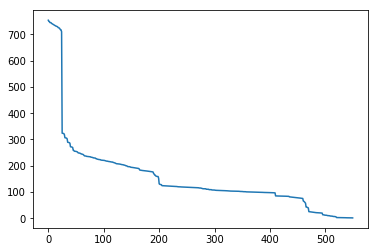

In [18]:
%matplotlib inline  
# We want to rank all attributes, and the best ones will be selected later
selector = SelectKBest(f_regression, k="all")
selector.fit(Xtrain, ytrain)
sorted_attributes = np.argsort(-selector.scores_)
sorted_scores = np.sort(-selector.scores_)
for index,element in enumerate(zip(sorted_attributes, sorted_scores)):
    #print(element)
    if index>10: break
        
plt.plot(-sorted_scores)
plt.show()

Prepare a new train data using sorted attributes and check whether RMSE value changes:

In [19]:
# Prepare a new train data using sorted attributes from above
X_train_new = Xtrain[:, sorted_attributes]
X_test_new = Xtest[:, sorted_attributes]

clf_sorted = tree.DecisionTreeRegressor(random_state=0)
clf_sorted = clf_sorted.fit(X_train_new, ytrain)
y_test_pred_sorted = clf_sorted.predict(X_test_new)
print(math.sqrt(metrics.mean_squared_error(ytest, y_test_pred_sorted)))

527.9866276261979


Looking at the plot, it appears that it should be possible to use 450 attributes to get a similar accuracy. So, checking only the first 450 attributes of the sorted set, we get the RMSE value even lower which means we remove 100 variables from the model we get an even better accuracy:

In [20]:
clf_red = tree.DecisionTreeRegressor(random_state=0)
clf_red = clf_red.fit(X_train_new[:,:450], ytrain)
y_test_pred_red = clf_red.predict(X_test_new[:,:450])
print(math.sqrt(metrics.mean_squared_error(ytest, y_test_pred_red)))

525.8844854312125


Prepare a new train data using only the attributes from Sotavento location and see how RMSE changes:

In [21]:
# Prepare a new train data using only the attributes from Sotavento location
Xtrain_sotavento = Xtrain[:, list(range(18,550,25))] # start from 18th index, which is attribute 'p54.162.13' for Sotavento
Xtest_sotavento = Xtest[:, list(range(18,550,25))]

clf_sotavento = tree.DecisionTreeRegressor(random_state=0)
clf_sotavento = clf_sotavento.fit(Xtrain_sotavento, ytrain)
ytest_pred_sotavento = clf_sotavento.predict(Xtest_sotavento)
print(math.sqrt(metrics.mean_squared_error(ytest, ytest_pred_sotavento)))

532.9148414962884


The value of RMSE is slightly higher using only the attributes from Sotavento location, but this is only using 22 variables instead of 550, which is a massive decrease!

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

param_grid = {'feature_selection__k': np.arange(Xtrain.shape[1])+1,
              'regression__min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14]}

partitions = [(indicesTrain, indicesVal)]

pipeline = Pipeline([
  ('feature_selection', SelectKBest(f_regression)),
  ('regression', tree.DecisionTreeRegressor(random_state=0))
])

clf_grid = GridSearchCV(pipeline,
                        param_grid,
                        scoring='neg_mean_squared_error',
                        cv=partitions, n_jobs=1, verbose=1, refit=False)

%time clf_grid = clf_grid.fit(Xava,yava)

Fitting 1 folds for each of 7150 candidates, totalling 7150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
print(clf_grid.best_params_, clf_grid.best_score_)

For the sequential feature selection in mlxtend we've tried it in two different ways (however, neither finished running, hence we're unsure which way would perform better), first, setting only the upper bound for the number of features and include within the pipeline to create the model directly:

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


dtr = tree.DecisionTreeRegressor(random_state=0)
partitions = [(indicesTrain, indicesVal)]

sfs = SFS(dtr,
          k_features=265,
          forward=True,
          floating=False,
          scoring='neg_mean_squared_error',
          verbose=1,
          cv=partitions)

pipeline = Pipeline([
  ('sfs', sfs),
  ('regression', dtr)
])

param_grid = {'sfs__k_features': [265],
              }


gs=GridSearchCV(estimator=pipeline,
                param_grid=param_grid,
                scoring='neg_mean_squared_error',
                cv=5,
                n_jobs=1,
                verbose=1,
                refit=False)

gs.fit(Xava, yava)

dtr.set_params(**gs.best_params_)
%time _ = dtr.fit(Xtrain, ytrain)
yval_pred = dtr.predict(Xval)

print("MAE for xgboost regressor with tuned hyper-parameters is {}".format(mae(yval_pred, yval)))
print("Best parameters: {} and MAE for best parameters: {}".format(gs.best_params_, -gs.best_score_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:    2.1s finished
Features: 1/265[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 549 out of 549 | elapsed:    3.4s finished
Features: 2/265[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 548 out of 548 | elapsed:    4.8s finished
Features: 3/265[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 547 out of 547 | elapsed:    6.0s finished
Features: 4/265[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 546 out of 546 | elapsed:    7.5s finished
Features: 5/265[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Paralle

Secondly, we set both lower and upper bounds and plotting the features depending on the standard error. Then, if this has finished running, we would take the indices of the best attributes, and creating new training and testing sets, we would evaluate this new model.

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(clf, 
          k_features=(20,265),
          scoring='neg_mean_squared_error',
          verbose=1,
          cv=3)

sfs.fit(Xtrain, ytrain)

sfs = sfs.fit(Xtrain, ytrain)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:    4.4s finished
Features: 1/265[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 549 out of 549 | elapsed:    6.6s finished
Features: 2/265[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 548 out of 548 | elapsed:    9.1s finished
Features: 3/265[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 547 out of 547 | elapsed:   12.1s finished
Features: 4/265[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 546 out of 546 | elapsed:   15.2s finished
Features: 5/265[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 545 out of 545 | elapsed:   17.6s finished
Features: 6/265[Par

All in all, it appears that using 265 attributes has given the best results (which is more than half the total number of variables), i.e. the lowest Mean Absolute Error, however, we've discovered that only using the 22 variables for the Sotavento location gives only a slightly worse result, however, this means only having to use 4% of the total number of variables.